# SIR model

Reworked from http://epirecip.es/epicookbook/chapters/sir/julia

- $S(t)$ = number of *s*usceptible individuals at time $t$
- $I(t)$ = number of *i*nfectious individuals at time $t$
- $R(t)$ = number of *r*ecovered / removed individuals at time $t$

Satisfy $S + I + R = N$, total population

Write in terms of the *proportions* $S(t) / N$.

At *each* time $t > 0$ we have the following **system of ODEs**:

\begin{align*}
\frac{dS(t)}{dt} &= -\beta S(t) I(t) \\
\frac{dI(t)}{dt} &= +\beta S(t) I(t) - \gamma I(t) \\
\frac{dR(t)}{dt} &= +\gamma I(t)
\end{align*}

$dS / dt$ is the *rate of change* of $S(t)$

Simpler: Rewrite without the explicit functions of $t$, and use notation $\dot{S} := \frac{dS}{dt}$

\begin{align*}
\dot{S} &= -\beta S I \\
\dot{I} &= +\beta S I - \gamma I \\
\dot{R} &= +\gamma I
\end{align*}

We define a function to represent the right-hand side of the system of ODEs.

We need a function that accepts the vector `u` of the current values of all the variables $u = (S(t), I(t), R(t))$, as well as the time $t$ and the parameter values $p$.

It also accepts another variable `du`. This is another (pre-allocated) vector, where it will write the output. Note that you should *not* create a new vector yourself; you must write into the pre-existing vector `du`.

You must use this ordering of the arguments to the function in order to use that function with `DifferentialEquations.jl`.

In [1]:
using DifferentialEquations

In [2]:
#vector u at time t = (S(t), I(t), R(t))
function sir_ode!(du, u, p, t)
    
    #unpack variables and parameters:
    S, I, R = u
    β, γ = p
    
    #define differential equations:
    dS = -β*S*I
    dI = β*S*I - γ*I
    dR = γ*I
    
    du .= (dS, dI, dR)
end

sir_ode! (generic function with 1 method)

In [3]:
β = 0.1
γ = 0.05

parameters = [β, γ]

S₀ = 0.99
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

t_span = [0.0, 200.0] #initial and final time

#set up problem:
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

#solve problem:
solution = solve(problem, saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 [0.9889858808542668, 0.010501675250119254, 0.000512443895613971]
 [0.98

In [4]:
using Plots

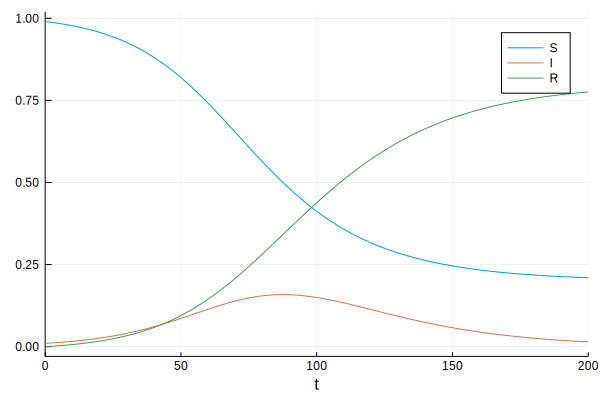

In [6]:
plot(solution, label = ["S" "I" "R"])

In [7]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7816917936912118615\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17496532861724228427\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7816917936912118615\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [8]:
S₀ = 0.99
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

3-element Array{Float64,1}:
 0.99
 0.01
 0.0

In [9]:
r = 0.0:0.001:2.0

@manipulate for β in r, γ in r, T in 0:1:500.0
    parameters = [β, γ]
    
    t_span = [0, T] #initial and final time

    #set up problem:
    problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

    #solve problem:
    solution = solve(problem, saveat = 0.1)
    
    plot(solution, label = ["S" "I" "R"])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 2001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1001, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010b439d50, Task (runnable) @0x000000010b439d50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.001\",\"0.002\",\"0.003\",\"0.004\",\"0.005\",\"0.006\",\"0.007\",\"0.008\",\"0.009\",\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\",\"0.019\",\"0.02\",\"0.021\",\"0.022\",\"0.023\",

In [11]:
t = 3.1
solution(t) #returns the vector of all variables at the given time

3-element Array{Float64,1}:
 0.9866917515035839
 0.01163461798104764
 0.001673630515368449

# Calculating with Uncertainties

In [13]:
]add Measurements

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [

    Fetching: [================>                        ]  

    Fetching: [======================>                  ]  53.

    Fetching: [=============================>

Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed OpenBLAS_jll ─ v0.3.9+4
  Installed Measurements ─ v2.1.1
######################################################################### 100.0%##O=#  #                                                                                        13.3%                        15.3%                        16.8%                         18.5% 20.6%%                    28.4% 30.4% 32.5%                 34.5%                  36.5%              38.2%   45.7% 51.7%          55.2%######                                  57.1%             58.8%########                               60.8%###                         69.2%                    70.7%               72.4%                     74.5%           82.4%#####              84.5% 86.5%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [eff96d63] + Measurements v2.1.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [49dc2e85] + Calculus v0.5.1
  [eff96d63] + Measurements v2.1.1
  [4536629a] ↑ OpenBLAS_

In [14]:
using Measurements

┌ Info: Precompiling Measurements [eff96d63-e80a-5855-80a2-b1b0885c5ab7]
└ @ Base loading.jl:1260


In [15]:
x = 0.1 ± 0.01

0.1 ± 0.01

In [16]:
typeof(x)

Measurement{Float64}

We can think of this as saying "we are uncertain about the value of $x$: it is somewhere in the range [0.1-0.01, 0.1+0.01]"

Any measurement of a real physical, biological, economic etc. system has an uncertainty like this

# SIR model with uncertainty

In [17]:
β = 0.1 ± 0.01
γ = 0.05 ± 0.01

parameters = [β, γ]

S₀ = 0.99
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

t_span = [0.0, 200.0] #initial and final time

#set up problem:
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

#solve problem:
solution = solve(problem, saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Array{Array{Measurement{Float64},1},1}:
 [0.99 ± 0.0, 0.01 ± 0.0, 0.0 ± 0.0]
 [0.9899008 ± 1.0e-5, 0.010049 ± 1.4e-5, 5.01e-5 ± 1.0e-5]
 [0.989801 ± 2.0e-5, 0.010098 ± 2.8e-5, 0.0001 ± 2.0e-5]
 [0.989701 ± 3.0e-5, 0.010148 ± 4.3e-5, 0.000151 ± 3.0e-5]
 [0.9896 ± 4.1e-5, 0.010198 ± 5.7e-5, 0.000202 ± 4.0e-5]
 [0.989499 ± 5.1e-5, 0.010248 ± 7.2e-5, 0.000253 ± 5.0e-5]
 [0.989397 ± 6.2e-5, 0.010298 ± 8.7e-5, 0.000304 ± 6.0e-5]
 [0.989295 ± 7.3e-5, 0.01035 ± 0.0001, 0.000356 ± 7.0e-5]
 [0.989193 ± 8.4e-5, 0.0104 ± 0.00012, 0.000408 ± 8.0e-5]
 [0.989089 ± 9.5e-5, 0.01045 ± 0.00013, 0.00046 ± 9.0e-5]
 [0.98899 ± 0.00011, 0.0105 ± 0.00015, 0.000512 ± 0.0001]
 [0.98888 ± 0.00012, 0.01055 ± 0.00016, 0.00057 ± 0.00011]
 [0

In [21]:
plot(solution, alpha=0.1, label=["S", "I", "R"], lw=3)

# Our own measurement types

In [22]:
struct MyMeasurement
    mid::Float64
    width::Float64
end

In [23]:
MyMeasurement(3.0,1.0)

MyMeasurement(3.0, 1.0)

In [25]:
function Base.show(io::IO, x::MyMeasurement)
    print(io, "$(x.mid) ± $(x.width)")
end

In [26]:
x = MyMeasurement(3,1)

3.0 ± 1.0

In [27]:
Measurements.:±(x,y) = MyMeasurement(x, y)

In [28]:
import Base: +

+(x::MyMeasurement, y::MyMeasurement) = MyMeasurement(x.mid + y.mid, x.width + y.width)

+ (generic function with 283 methods)

In [29]:
x = MyMeasurement(2, 0.1)
y = MyMeasurement(3, 0.01)

3.0 ± 0.01

In [30]:
x + y

5.0 ± 0.11

# Anonymous functions

What is an **anonymous function**?

In [32]:
x -> 3x #the function that maps a value x to the value 3x

#7 (generic function with 1 method)

In [33]:
(x->3x)(10)

30

In [34]:
g = x -> 3x

#11 (generic function with 1 method)

In [35]:
g(10)

30

In Julia: common function to pass functions as arguments to other functions. Useful to use anonymous functions.

A function that takes another function as argument is a **high-order function**

E.g. `map`

In [36]:
f(x) = 2x

f (generic function with 1 method)

In [37]:
v = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [38]:
f.(v)

3-element Array{Int64,1}:
 2
 4
 6

In [39]:
map(f, v)

3-element Array{Int64,1}:
 2
 4
 6

In [40]:
map(x->2x+1, v)

3-element Array{Int64,1}:
 3
 5
 7

In [41]:
f(x,y) = x^2 + y

f (generic function with 2 methods)

In [42]:
a, b = 1, 2

(1, 2)

I want a new function where the value of y is fixed at b

In [43]:
x -> f(x,b)

#15 (generic function with 1 method)

In [44]:
g = x -> f(x,b)

#17 (generic function with 1 method)

In [45]:
g(10)

102

# Linear Regression

## Make some noisy data

In [46]:
xs = 0:0.05:5
ys = 1 .+ 0.5*(sqrt.(xs) .+ 0.8 * rand(length(xs))).^2;

In [47]:
using Plots

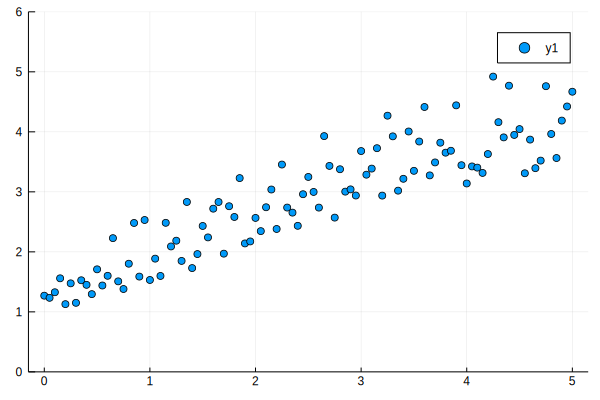

In [48]:
scatter(xs, ys, ylim=(0, 6))

# How can we fit a straight line to this data?

In [49]:
# ax + b

line(x, a, b) = a * x + b

line (generic function with 1 method)

In [52]:
using Interact

In [53]:
a = 0.1
b = -0.3

@manipulate for a in -1:0.01:1, b in -1:0.01:1
    scatter(xs, ys, ylim=(0,6))
    plot!(0:0.01:6, x->line(x,a,b))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012fcc6ad0, Task (runnable) @0x000000012fcc6ad0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",\"-0.79\",\"-0.78\",\"-0.77\",\